In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp


In [2]:
tenant =  pd.read_csv("../Data/Tenant_Data.csv")
country = pd.read_csv("../Data/Country_Continent_Mapping.csv")
feature = pd.read_csv("../Data/Feature_Usage.csv")
notification = pd.read_csv("../Data/Notification_Data.csv")
performance = pd.read_csv("../Data/Performance_Data.csv")
config = pd.read_csv("../Data/Team_Configuration.csv")

In [21]:
profile = pp.ProfileReport(tenant)
profile

In [4]:
tenant.head()

Hashed_UserId      Hashed_TenantId  Dark28_Flag  NFADark28_Flag  \
0  4227394271901347755 -2159010501029736329            1               1   
1 -5088527044408957427 -8733685046642977766            0               0   
2  1301452877743959107  -847473421352336837            0               0   
3 -3702345212681947512  3663531590727950337            1               1   
4  8370901830809396045 -1296662432816386589            1               1   

  EDU_Flag  MAU_LYO  MAU_SPO  MAU_EXO Tenant_Country           Vertical_Name  \
0      EDU        5      565      570    Switzerland                 Unknown   
1   Others     1471    44795   133135  United States  Wholesale Distribution   
2   Others     3810     8131    11487  United States          Water & Sewage   
3   Others     9739     8384    18668  United States                 Unknown   
4   Others    35209    58462    61412        Belgium  Wholesale Distribution   

             Industry_Name                         Segment_Group  MAU_Teams  \
0                      NaN   Small, Medium & Corporate Education          6   
1                Retailers                  Strategic Enterprise      20006   
2        Power & Utilities  Small, Medium & Corporate Commercial        523   
3                      NaN  Small, Medium & Corporate Commercial        345   
4  Travel & Transportation                  Strategic Enterprise       6597   

   Creators  MAU_O365  Freqs  
0         1       712      0  
1      6967    128532   5699  
2       208     10893    114  
3       113     17593     67  
4      2827     84698   1389

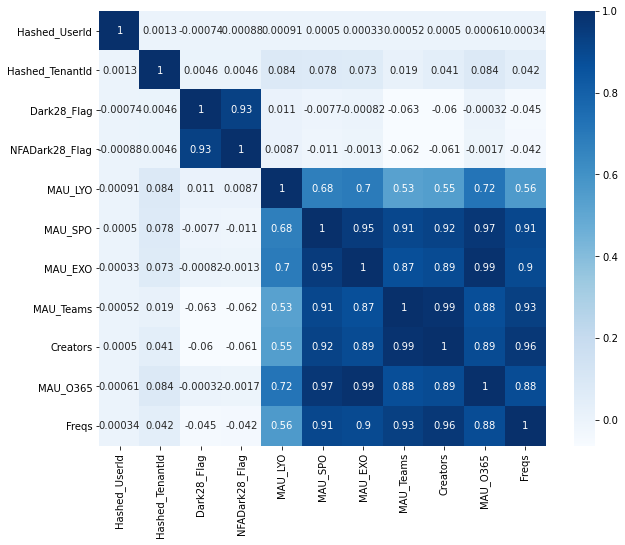

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(tenant.corr(), annot=True, cmap="Blues")

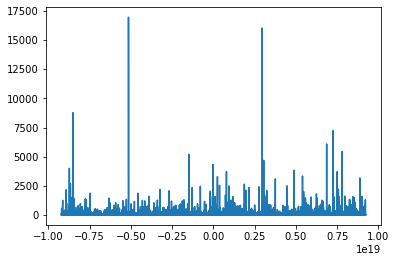

In [6]:
grouped = tenant.groupby(["Hashed_TenantId"])

groups = list(grouped.groups.keys())
data = list(grouped["Hashed_UserId"].count())

sns.lineplot(groups, data)

## Largest Tenant

In [7]:
# Number of Tenants
n = len(groups)
print("Number of Tenents:", n)

# tenants with more than 2500 users
df = pd.DataFrame({
    "Tenant_Id": groups,
    "Number_Of_Users": data
})

df[df["Number_Of_Users"] >= 2500]

Number of Tenents: 72713


Tenant_Id  Number_Of_Users
1838  -8733685046642977766             4002
2106  -8669700830250458460             2678
2667  -8518367470328644694             8780
15976 -5150007126700996573            16977
30247 -1488166394027985972             5209
36016   -30175761512113140             4324
37084   240082492861586135             3293
37585   366087746691249505             2546
39171   786154946086898823             3724
43418  1870509878568846399             2642
47801  2956607016025495671            16050
48142  3045081670999478538             4685
50936  3747737580839736632             3094
55515  4892047367928326490             3834
57544  5395798678740378572             3346
63405  6858781620540402256             6096
65029  7257419746273984411             7255
65972  7498467458995569124             3710
67146  7801849162377668196             5456
71319  8868022130097118967             3173

In [8]:
performance.head()

Hashed_UserId  Number_of_Failures_OneOnOne  Number_of_Failures_Channel  \
0   1.750460e+18                            0                           0   
1   7.259330e+18                            0                           0   
2   2.599120e+18                            0                           0   
3  -8.332260e+17                            0                           0   
4  -2.617940e+18                            0                           0   

   Number_of_Failures_GroupChat  Number_of_Failures_Calls  Avg_ALT  \
0                             0                         0      0.0   
1                             0                         0      0.0   
2                             0                         0      0.0   
3                             0                         0      0.0   
4                             0                         0      0.0   

   Avg_Switch_Channel  Avg_Switch_Chat  Avg_Frame_PLT  
0                 0.0              0.0            0.0  
1                 0.0              0.0            0.0  
2                 0.0              0.0            0.0  
3                 0.0              0.0            0.0  
4                 0.0              0.0            0.0

### Insights to be driven
1.	Number of users churned
2.	Users churned
3.	Number of educational 
4.	Number of non-educational
5.	Which feature is used the most?
    1.	Lync
    2.	Sharepoint
    3.	Exchange Online
    4.	Overall Teams users
6.	Country of Tenant
7.	Continent of the Tenant
8.	Verticals where Teams is used the most
9.	Industries where Teams is used the most
10.	Which segment are Tenants being categorized the most?
11.	Which verticals belong to which Industry
12.	Frequency by which a user is using Teams
13.	Number of actions by a tenant / user
    1.	Sent (Created) actions
    2.	Read actions
    3.	Files created
    4.	Meetings created and read
    5.	One on one
    6.	Group
    7.	Calls
14.	Number of notifications + number of active feeds should be equivalent to number of messages + calls + meetings sent to the user
15.	User requirement of
    1.	Teams created and used
    2.	Channels
    3.	Team Favourites and unfavourited
    4.	Channel Favourites
16.	Which application is used the most (mobile, desktop, or webapp)?
17.	Number of failures
18.	Correlations between the failure and churn


In [9]:
# Columns present in the datasets
def dataset_columns():
    print("tenant:", tenant.shape)
    print("Tenants:", tenant.columns, end="\n\n")
    print("country:", country.shape)
    print("country:", country.columns, end="\n\n")
    print("feature:", feature.shape)
    print("feature:", feature.columns, end="\n\n")
    print("notification:", notification.shape)
    print("notification:", notification.columns, end="\n\n")
    print("performance:", performance.shape)
    print("performance:", performance.columns, end="\n\n")
    print("config:", config.shape)
    print("config:", config.columns, end="\n\n")

In [10]:
dataset_columns()

tenant: (1124120, 16)
Tenants: Index(['Hashed_UserId', 'Hashed_TenantId', 'Dark28_Flag', 'NFADark28_Flag',
       'EDU_Flag', 'MAU_LYO', 'MAU_SPO', 'MAU_EXO', 'Tenant_Country',
       'Vertical_Name', 'Industry_Name', 'Segment_Group', 'MAU_Teams',
       'Creators', 'MAU_O365', 'Freqs'],
      dtype='object')

country: (209, 2)
country: Index(['Country_Name', 'Continent_Name'], dtype='object')

feature: (1074667, 12)
feature: Index(['Hashed_UserId', 'ChannelPostConvo_Thread', 'ChannelWiki_Create',
       'ChannelWiki_Read', 'ChannelTab_Create', 'ChannelTab_Read',
       'File_Create', 'Meeting_Create', 'Meeting_Read', 'OneOnOneMsg_Create',
       'GroupMsg_Create', 'Call_Audio_Video'],
      dtype='object')

notification: (1179519, 3)
notification: Index(['Hashed_UserId', 'Notifications_Received', 'ActivityFeed_Views'], dtype='object')

performance: (1048575, 9)
performance: Index(['Hashed_UserId', 'Number_of_Failures_OneOnOne',
       'Number_of_Failures_Channel', 'Number_of_Failures_

In [11]:
# Unique Tenants
print("Unique Tenants:", np.unique(tenant["Hashed_TenantId"]).shape)

Unique Tenants: (72713,)


In [12]:
print("Unique Tenants:", np.unique(tenant["Hashed_UserId"]).shape)

Unique Tenants: (1124120,)


In [13]:
tenant.head()

Hashed_UserId      Hashed_TenantId  Dark28_Flag  NFADark28_Flag  \
0  4227394271901347755 -2159010501029736329            1               1   
1 -5088527044408957427 -8733685046642977766            0               0   
2  1301452877743959107  -847473421352336837            0               0   
3 -3702345212681947512  3663531590727950337            1               1   
4  8370901830809396045 -1296662432816386589            1               1   

  EDU_Flag  MAU_LYO  MAU_SPO  MAU_EXO Tenant_Country           Vertical_Name  \
0      EDU        5      565      570    Switzerland                 Unknown   
1   Others     1471    44795   133135  United States  Wholesale Distribution   
2   Others     3810     8131    11487  United States          Water & Sewage   
3   Others     9739     8384    18668  United States                 Unknown   
4   Others    35209    58462    61412        Belgium  Wholesale Distribution   

             Industry_Name                         Segment_Group  MAU_Teams  \
0                      NaN   Small, Medium & Corporate Education          6   
1                Retailers                  Strategic Enterprise      20006   
2        Power & Utilities  Small, Medium & Corporate Commercial        523   
3                      NaN  Small, Medium & Corporate Commercial        345   
4  Travel & Transportation                  Strategic Enterprise       6597   

   Creators  MAU_O365  Freqs  
0         1       712      0  
1      6967    128532   5699  
2       208     10893    114  
3       113     17593     67  
4      2827     84698   1389

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

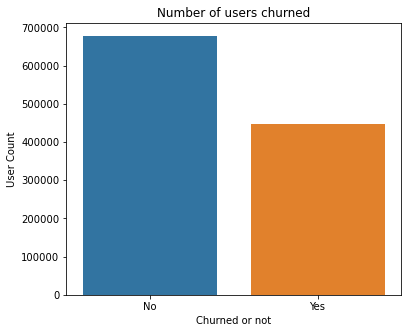

In [14]:
(val, count) = np.unique(tenant["Dark28_Flag"], return_counts=True)


plt.figure(figsize=(6,5))
plot = sns.barplot(val, count)
plt.xlabel("Churned or not")
plt.ylabel("User Count")
plt.title("Number of users churned")
plot.set_xticklabels(["No", "Yes"])

In [15]:
# Churned users
churned = tenant[tenant["Dark28_Flag"] == 1].copy()
print("Churned Shape:",churned.shape)
# non-churned
non_churned = tenant[tenant["Dark28_Flag"] == 0].copy()
print("Non_churned shape:", non_churned.shape)

Churned Shape: (446637, 16)
Non_churned shape: (677483, 16)


In [16]:
# Churned users
churned_nfa = tenant[tenant["NFADark28_Flag"] == 1].copy()
print("Churned Shape:",churned.shape)
# non-churned
non_churned_nfa = tenant[tenant["NFADark28_Flag"] == 0].copy()
print("Non_churned shape:", non_churned.shape)

Churned Shape: (446637, 16)
Non_churned shape: (677483, 16)


In [17]:
churned_users = np.array(churned["Hashed_UserId"])
churned_users_nfa = np.array(churned_nfa["Hashed_UserId"])

In [18]:
len(list(set(churned_users_nfa) - set(churned_users)))

37740

In [19]:
only_nfa = np.unique(churned_nfa[~churned_nfa["Hashed_UserId"].isin(churned["Hashed_UserId"])]["Hashed_TenantId"])
only_nfa

array([-9219575119524447715, -9219116389871989601, -9216339312309224033,
       ...,  9210198277729440364,  9219964509614428363,
        9220368851708650234], dtype=int64)

In [22]:
tenant.shape

(1124120, 16)